## The problem of overfitting

Overfitting might seem very well to fit the training data, but because of high variance it will fail to fit the new data/ samples. There are two main ways to solve the issue of overfitting

1. Reducing the number of features by manually selecting important features or using feature selction algorithms to decide which features has to be kept/ eliminated. Mostly overfitting is observed when number of features are high and nubmer of data/samples are less $(n<m)$.

2. Regualarization- There is disadvantage associated with reducing the number of features becuase sometimes we may loss informiation of the data. Therefore, we like to keep all the features and reduce the weight $\beta_i$ associated with that particular feature. 


Automatically created module for IPython interactive environment


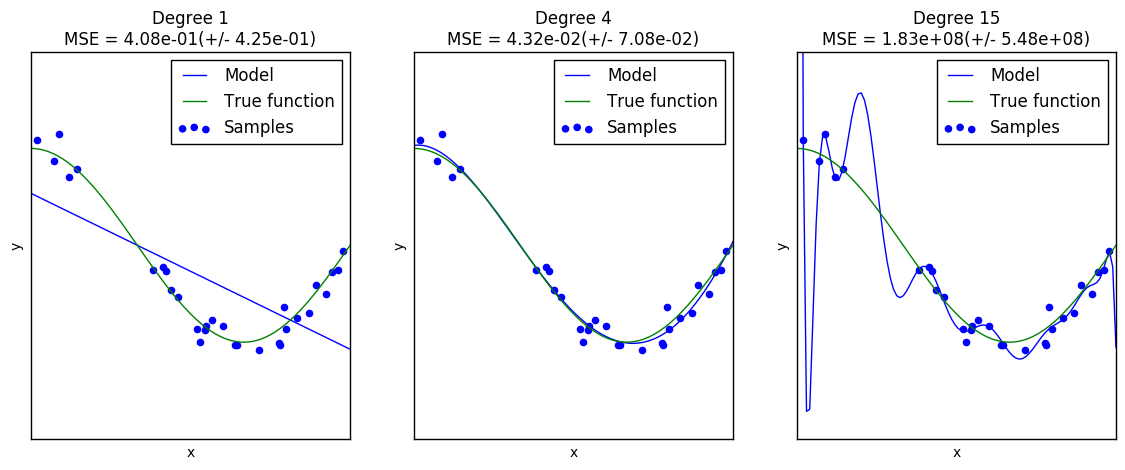

Usually, its Noise which causes overfitting of data. Noise are those data points in the dataset which don’t really represent the true properties of your data.

To deal with the problem of overfitting we take the help of regularization techniques. which are classified into two catagories-
 


1. Lasso Regression (L1 norm)
2. Ridge Regression (L2 norm)
 
first we will discuss the L2-Ridge Regression-
 
In this technique, the cost function is altered by adding the penalty term (shrinkage term), which multiplies the tuning parameter $λ$ with the squared weight of each individual feature. It tries to minimie the cofficient, but never minimies them exactly to $0$.In simple words, it is trying to introduce some bias in the model.

#### Usage of Ridge Regression:

1. When we have the features or independent variables which are having high collinearity between them, at that time general linear or polynomial regression will fail so to solve the problems. In such cases Ridge can serve the purpose.

2. If we have more data point than the features, then Ridge regression helps to solve the problems.
 

####  Limitation of Ridge Regression:

It decreases the complexity of a model but does not reduce the number of features or independent variables Therefore, this method is not good for feature selection.

### Lasso Regression (Least Absolute and Selection Operator)

It is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights. 


In this technique, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter $λ$ is suﬃciently large. Hence, the lasso method also performs Feature selection and is said to yield sparse models.

#### Limitation of Lasso Regression:

1. If the number of features is greater than the number of data points, Lasso will pick at most relevent top n features as non-zero, even if other features are also relevant.

2. Multicollinearity Problem: If there are two or more highly collinear features then LASSO regression selects one of them randomly which is not good for the training of our model.

### Tuning parameter $λ$

λ is the tuning parameter also called penatly value and used in regularization that decides how much we want to penalize the flexibility of our model i.e, controls the impact on bias and variance. As the value of $λ$ rises, it significantly reduces the value of coefficient estimates and thus reduces the variance. Till a point, this increase in λ is beneficial for our model as it is only reducing the variance (hence avoiding overfitting), without losing any important properties in the data. If $λ$ is too high then model may start lossing some of the important features. And, giving rise to bias in the model and thus underfitting.

So, how do we choose the penalty value lambda? The answer is Cross-Validation.

Cross-validation is a way to tune the hyperparameters using only the training data. There are different variations of cross-validation, but the most common one is 10-Fold Cross-Validation.

We will discuss more about Cross-validation in our upcoming discussion. 

## L2 Regularization with Linear regression ....

Generally, it is observed that overfittig occurs because of high variance. It implies that regression model is bias towards higer order features. To Avoid such sitaution we can make sure that value of $\beta$ associated with such features should be small. It will prevent the high bias or high variance in data by small contribution from each feature.

$$J(\beta) = {1 \over 2m} \sum_{i=1}^m \left( h_\beta(x^{(i)}) - y^{(i)} \right)^2 + {\lambda \over 2m} \sum_{j=1}^n \beta_j^2 $$

where ${\lambda \over 2n} \sum_{j=1}^m\beta_j^2$ is regulaeization term and $\lambda$ is the regularization parameter. It determines how much the costs of our $\beta$ parameters are inflated.

By using this new cost function with an extra summatio term, we can smooth the output of our classfification model to reduce the overfitting of data. If we choose $\lambda$ too large, it may overly smooth the output function which may cause the underfitting of data. Therefore, it is very critical to choose the right value of $\lambda$.

## Regularization for Gradient descent

$$\begin{align}
    \frac {\partial} {\partial \beta_j} J(\beta) &= \frac {\partial} {\partial \beta_j} \left ({1 \over 2n}  \sum_{i=1}^m \left( h_\beta(x^{(i)}) - y^{(i)} \right)^2 + {\lambda \over 2n} \sum_{i=1}^m \beta_j^2  \right) \\
    &= {1 \over n} \sum_{i=1}^n \left( h_\beta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac {\lambda} {n} \beta_j \\
  \end{align} $$

$$\text{repeat until convergence:}$$
$$ \beta_0 := \beta_0 - \alpha \left[ {1 \over n} \sum_{i=1}^n \left( h_\beta(x^{(i)}) - y^{(i)} \right) x_0^{(i)} \right]$$
$$\beta_j := \beta_j - \alpha \left[ {1 \over n} \sum_{i=1}^n \left( h_\beta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac {\lambda} {n} \beta_j \right]$$

Where, $j \in \{1, 2, \cdots, m\}$. above equations doesnt contaian any regularization term for $j=0$. We can rewrite both the equation as

$$\beta_j := \beta_j \left(1 - \alpha {\lambda \over n} \right) - \alpha {1 \over n}  \sum_{i=1}^n \left( h_\beta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
 
Here $\alpha$ and $\lambda$ both are positive, hence $ \left(1 - \alpha {\lambda \over n} \right)$ is always less than $1$.

## Normal equation or vectorized representation 

$$\begin{align*}& \beta = \left( X^{\rm T}X + \lambda \cdot L \right)^{-1} X^{ \rm T}y \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$$

L is a matrix with $0$ (as we are not including $x_0$ at the top left and $1$'s down the diagonal, with $0$'s everywhere else. It should have dimension $(m+1)*(m+1)$. 

Note: If $n<m$, then $( X^{\rm T}X$ is non invertable matrix. When we add the extra term $\lambda.L$, then $( X^{\rm T}X+\lambda.L)$ becomes a invertible matrix.

## Regularization with logistic regression 

### Cost function 

Similar to the linear regression, even logistic regression is prone to overfitting if there are large number of features. If the decision boundary is overfit, the shape might be highly contorted to fit only the training data while failing to generalise for the unseen data.
So, the cost function of the logistic regression is updated to penalize high values of the parameters and is given by,

$$J(\beta) = -{1 \over n} \sum_{i=1}^n \left( y^{(i)}\,log(h_\beta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\beta(x^{(i)})) \right) + {\lambda \over 2n} \sum_{j=1}^m\beta_j^2$$

where ${\lambda \over 2n} \sum_{j=1}^m\beta_j^2$ is regularization term and $\lambda$ is the regularization parameter. It determines how much the costs of our $\beta$ parameters are inflated.

## Regularization for Gradient Descent


$$\begin{align}
    \frac {\partial} {\partial \beta_j} J(\beta) &= \frac {\partial} {\partial \beta_j} \left[-{1 \over n} \sum_{i=1}^n \left( y^{(i)}\,log(h_\beta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\beta(x^{(i)})) \right) + {\lambda \over 2n } \sum_{j=1}^m \beta_j^2 \right] \\
    &= {1 \over n} \sum_{i=1}^n \left( h_\beta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac {\lambda} {n} \beta_j \\
  \end{align} $$


We will modify our gradient descent function to separate out 
$\beta_0$ from the rest of the parameters because we do not want to skip (or dont want to deal) $\beta_0$ as it is a bais term. Thus, while computing gradient descent, we should simultiounsly update the following equations-

$$\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \beta_0 := \beta_0 - \alpha\ \frac{1}{n}\ \sum_{i=1}^n (h_\beta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \beta_j := \beta_j - \alpha\ \left[  \frac{1}{n}\ \sum_{i=1}^n (h_\beta(x^{(i)}) - y^{(i)})x_j^{(i)}  + \frac{\lambda}{n}\beta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}$$


## Normal equation or vectorized representation 

$$\begin{align*}& \beta = \left( X^{\rm T}X + \lambda \cdot L \right)^{-1} X^{ \rm T}y \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$$

L is a matrix with $0$ (as we are not including $x_0$ at the top left and $1$'s down the diagonal, with $0$'s everywhere else. It should have dimension $(m+1)*(m+1)$. 

Note: If $n<m$, then $( X^{\rm T}X$ is non invertable matrix. When we add the extra term $\lambda.L$, then $( X^{\rm T}X+\lambda.L)$ becomes a invertible matrix.

In [109]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting curve
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [124]:
def h(X,a) : # model h(X) = Xa
    h = np.dot(X,a)
    return h

def a_opt(X,y) : # linear regression solution a = (X'X)^-1 X'y = pinv(X)y
    a_opt = np.dot( np.linalg.pinv(X), y)
    return a_opt

def J(a,X,y) : # Cost function 
    m = y.size
    J = 1/(2*m) * np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) )
    return J

def R2(a,X,y) : # R squared
    y_mean = y.mean()
    R2 = 1 - ( np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) ) / np.dot( ( y - y_mean ).T, ( y - y_mean ) ) )
    return R2


def f(x) :  # the data 
    f = x*np.sin(x/2)
    return f

np.random.seed(22)
noise = np.random.randn(6)  # some random "normal" noise

x = np.linspace(0,11,6) # x for training-set
y = x*np.sin(x/2) + noise  # y for training-set  

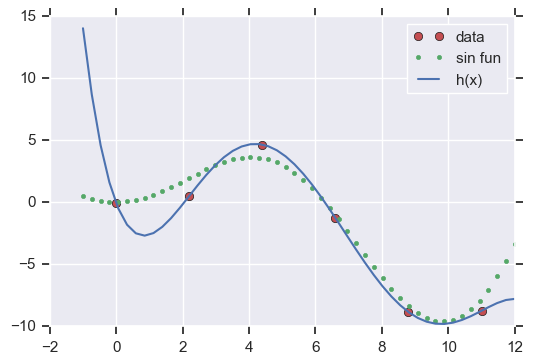

In [131]:
X = np.column_stack( (np.ones((x.size,1)) , x, x**2, x**3, x**4, x**5 )) # construct the augmented matrix X

a = a_opt(X,y)   # solve the regression 

fig, ax = plt.subplots()
ax.plot( x,y, "o", color='r', label='data')  # plot the test data

xt = np.linspace(-1,12,50)
ax.plot(xt, f(xt), '.', color='g', label='sin fun')
ax.plot(xt, a[0] + a[1]*xt + a[2]*xt**2 + a[3]*xt**3 + a[4]*xt**4 + a[5]*xt**5,
        label='h(x)')  # plot the model function
ax.legend()

In [126]:
def a_opt_reg(X,y,l_reg) : # linear regression with regularization a = (X'X + lL)^-1 X'y
    L = np.eye(X.shape[1])
    L[0,0] = 0
    XX = np.dot(X.T,X) + l_reg * L
    a_opt_reg = np.dot( np.dot( np.linalg.pinv(XX),X.T), y)
    return a_opt_reg

def J_reg(a,X,y,l_reg) : # Regularized Cost function 
    m = y.size
    J_reg = 1/(2*m) * (np.dot( ( h(X,a) - y ).T, ( h(X,a) - y ) ) + l_reg * np.dot(a[1:],a[1:]) )
    return J_reg

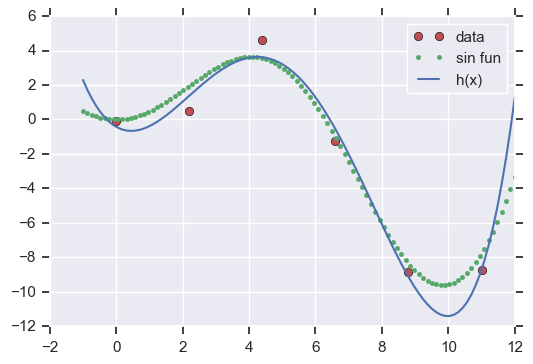

In [133]:
X = np.column_stack( (np.ones((x.size,1)) , x, x**2, x**3, x**4, x**5 )) # construct the augmented matrix X
l_reg = .2
a = a_opt_reg(X,y,l_reg)   # solve the regression 

fig, ax = plt.subplots()
ax.plot( x,y, "o", color='r', label='data')  # plot the test data


xt = np.linspace(-1,12,100)
ax.plot(xt, f(xt), '.', color='g', label='sin fun')
ax.plot(xt, a[0] + a[1]*xt + a[2]*xt**2 + a[3]*xt**3 + a[4]*xt**4 + a[5]*xt**5,
        label='h(x)')  # plot the model function
ax.legend()